# Califonia Housing problem 

Run: 23.7s

#### Load the datasets

In [63]:
#importing dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
full_df = pd.read_csv("/content/housing.csv")

In [65]:
print("Dataset Head:")
full_df.head()

Dataset Head:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [66]:
print("Dataset tail:")
full_df.tail()

Dataset tail:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Exploratory Data Analysis (EDA)

#### Exploring the various colomuns of the dataset. 

In [67]:
# list(data) or
list(full_df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [68]:
full_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that we have a total of 9 columns, let us iterate over each column and analyse them to understand the dataset better! 

1. longitude: A measure of how far west a house is; a more negative value is farther west
2. 	A measure of how far north a house is; a higher value is farther north
3. Median age of a house within a block; a lower number is a newer building
4. Total number of rooms within a block
5. Total number of bedrooms within a block
6. Total number of people residing within a block
7. Total number of households, a group of people residing within a home unit, for a block
8. Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. Median house value for households within a block (measured in US Dollars)

## Identifying any missing data

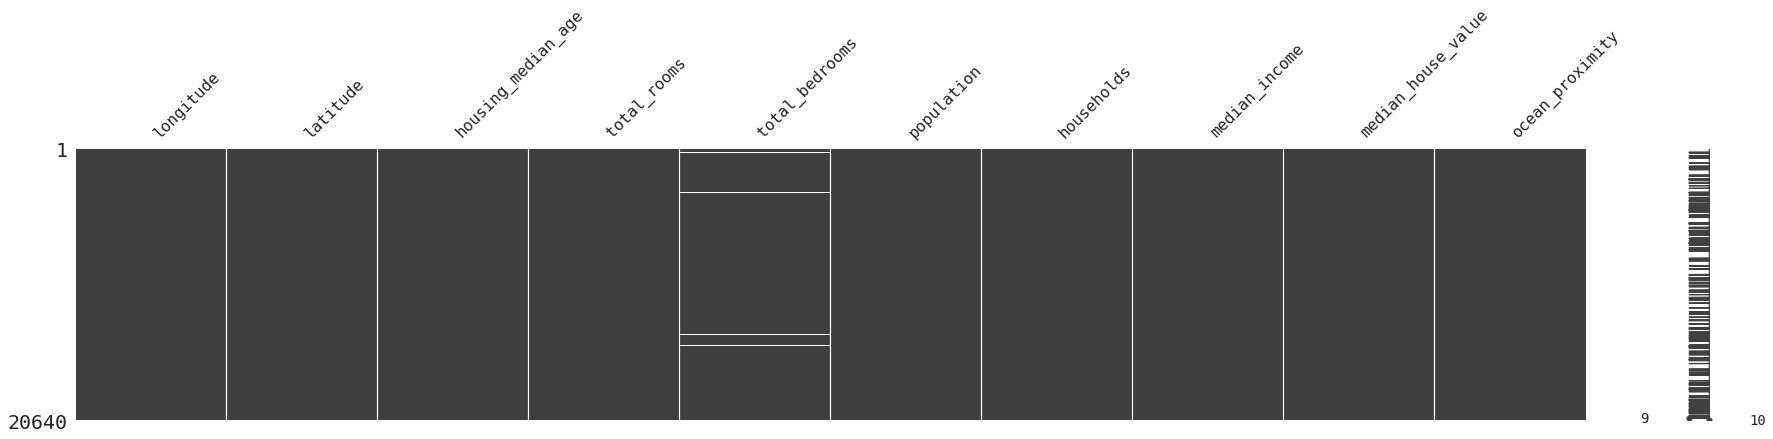

In [69]:
#Plot graphic of missing
import missingno
missingno.matrix(full_df, figsize = (30,5))

Total bedrooms has some missing data. 

In [70]:
#finding number of missing values 
full_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Bedrooms has only 270 missing values. As this is a categorical variable, we can replace missing data with mode value ie we are going to fill missing values with most common bedroom value

In [71]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

Writing a helper function to see the missing the missing data.

In [72]:
print("Missing data")
missingdata(full_df)

Missing data


,Total,Percent
total_bedrooms,207,1.002907


In [73]:
full_df['total_bedrooms'].fillna(full_df['total_bedrooms'].median(), inplace = True)
full_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Splitting dataset into train and test

In [74]:
X = full_df.drop('median_house_value', axis=1)
y = full_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [75]:
train_df = X_train.join(y_train)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,NEAR BAY,255600.0
1165,-121.55,39.51,50.0,1050.0,288.0,485.0,260.0,1.1607,INLAND,51700.0
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,NEAR OCEAN,152700.0
8220,-118.21,33.79,44.0,121.0,29.0,153.0,30.0,2.1964,NEAR OCEAN,150000.0
12588,-121.51,38.53,36.0,2603.0,408.0,966.0,419.0,5.3135,INLAND,216600.0
...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
9845,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [76]:
test_df = X_test.join(y_test)
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN,136900.0
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN,241300.0
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND,200700.0
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND,72500.0
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY,460000.0
...,...,...,...,...,...,...,...,...,...,...
4769,-118.35,34.04,41.0,1617.0,423.0,1110.0,375.0,2.4635,<1H OCEAN,169400.0
1724,-122.36,37.95,40.0,408.0,102.0,302.0,81.0,1.8333,NEAR BAY,69800.0
9323,-122.52,37.97,33.0,563.0,194.0,265.0,169.0,2.7500,NEAR BAY,231300.0
17271,-119.71,34.40,27.0,3782.0,771.0,1742.0,751.0,4.0451,NEAR OCEAN,395100.0


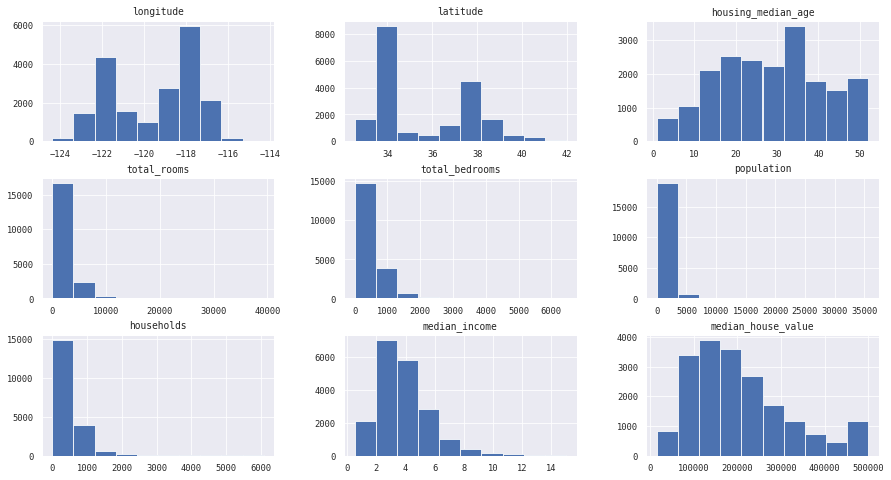

In [77]:
train_df.hist(figsize=(15, 8));

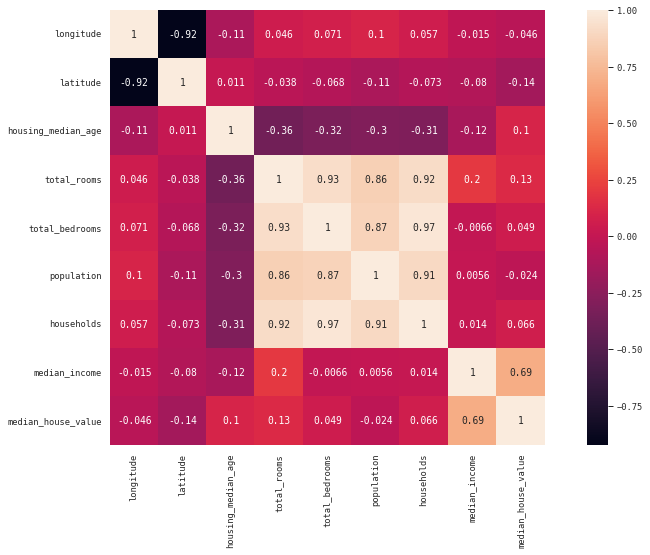

In [78]:
sns.set(context="paper",font="monospace")
train_df_corr_matrix = train_df.corr()
fig, axe = plt.subplots(figsize=(15,8))
sns.heatmap(train_df_corr_matrix,vmax=1,square =True,annot=True);

In [79]:
full_df['total_rooms'] = np.log(full_df['total_rooms'] + 1)
full_df['total_bedrooms'] = np.log(full_df['total_bedrooms'] + 1)
full_df['median_income'] = np.log(full_df['median_income'] + 1)
full_df['population'] = np.log(full_df['population'] + 1)
full_df['households'] = np.log(full_df['households'] + 1)

In [80]:
X_train = X_train.drop('ocean_proximity', axis=1)
X_test = X_test.drop('ocean_proximity', axis=1)

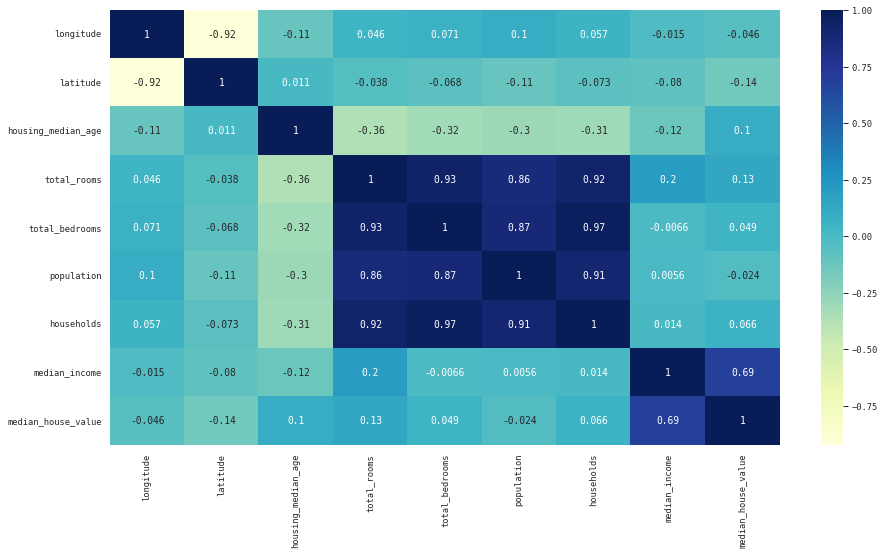

In [81]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    train_df.corr(),
    annot=True,
    cmap="YlGnBu"
)

** Choosing the alogorithm based on the values plotted by scatterplot **

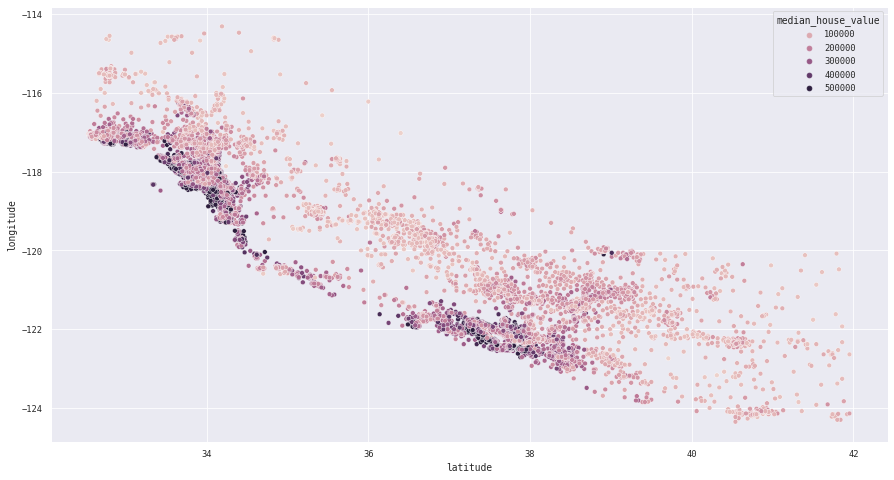

In [82]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=train_df,
    x="latitude",
    y="longitude",
    hue="median_house_value"
)

### Algorithm to solve the problem

In [83]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)
print('-------Training Set Accuracy-------->')
forest.score(X_train, y_train)

-------Training Set Accuracy-------->


0.9750750252781922

In [84]:
print('<-------Test Set Accuracy-------->')
forest.score(X_test, y_test)

<-------Test Set Accuracy-------->


0.8324247300156402